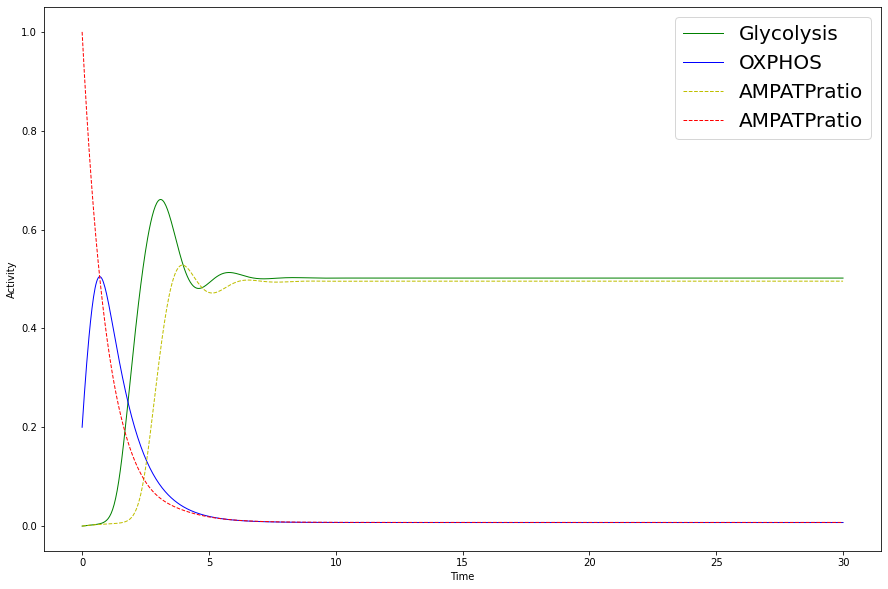

In [1]:
# Programa en Python para la simulación del modulo indivudual de metabolismo de células T CD4. 
# V 1.0
# Dr. David Martínez Méndez, Dr. Carlos Villarreal Luján, Dra. Leonor Huerta Hernández.
# Ciudad de México, 16 de Julio de 2021. Universidad Nacional Autónoma de México.
# davidmm@fisica.unam.mx

#Importamos las paqueterías, funciones y constantes matemáticas (ejem: e = euler):
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import e

DLKB1 = 1
DAMPK = 1
DGlycolysis = 1
DOXPHOS = 1
DAMPATPratio = 1
DMTORC1 = 1
DMTORC2 = 1

b = 10

MTOR = 1
AKT = 1
CA = 1
FOXP3 = 0

#Definimos:
def odes(x, t):
    MTORC1 = x[0]
    MTORC2 = x[1]
    LKB1 = x[2]
    AMPK = x[3]
    Glycolysis = x[4]
    OXPHOS = x[5]
    AMPATPratio = x[6]


    # Funciones difusas
    WMTORC1 = MTOR * (1 - AMPK)
    WMTORC2 = MTOR * AMPK
    WLKB1 = AKT * AMPATPratio
    WAMPK = (LKB1 * (1 - MTORC1)) + (CA * AMPATPratio * (1 - MTORC1)) + (AKT * AMPATPratio * (1 - MTORC1)) + (FOXP3) - (LKB1 * 
                                   (1 - MTORC1)) * (CA * AMPATPratio * (1 - MTORC1)) * (AKT * AMPATPratio * (1 - MTORC1)) * (FOXP3)
    WGlycolysis = MTORC1
    WOXPHOS = AMPK
    WAMPATPratio = Glycolysis * (1 - OXPHOS)

    # Ecuaciones diferenciales
    dMTORC1dt = 1 / (1 + e ** (-b * ((WMTORC1) - .5))) - DMTORC1 * MTORC1
    dMTORC2dt = 1 / (1 + e ** (-b * ((WMTORC2) - .5))) - DMTORC2 * MTORC2
    dLKB1dt = 1 / (1 + e ** (-b * ((WLKB1) - .5))) - DLKB1 * LKB1
    dAMPKdt = 1 / (1 + e ** (-b * ((WAMPK) - .5))) - DAMPK * AMPK
    dGlycolysisdt = 1 / (1 + e ** (- b * ((WGlycolysis * (1 - AMPATPratio)) - .5))) - DGlycolysis * Glycolysis
    dOXPHOSdt = 1 / (1 + e ** (-b * ((WOXPHOS) - .5))) - DOXPHOS * OXPHOS
    dAMPATPratiodt = 1/(1 + e ** (-b * ((WAMPATPratio) - .5))) - DAMPATPratio * AMPATPratio

    return [dMTORC1dt, dMTORC2dt, dLKB1dt, dAMPKdt, dGlycolysisdt, dOXPHOSdt, dAMPATPratiodt ]

#condiciones iniciales para cada ODE
x0 = [0, 0, 0, 1, 0, 0.2, 0]

# Solución:
# Declarar un vector de tiempo para la solución de ODEs
t = np.linspace(0,30,1000)

# Evaluar todos los vectores en forma de matriz de resultados "x"
x = odeint(odes,x0,t)

# Declarar y asignar las filas de matriz de resultados a cada elemento de la red
MTORC1 = x[:,0]
MTORC2 = x[:,1]
LKB1 = x[:,2]
AMPK = x[:,3]
Glycolysis = x[:,4]
OXPHOS = x[:,5]
AMPATPratio = x[:,6]

#ploteo
plt.figure(figsize=(15,10))
plt.plot(t,Glycolysis, 'g-', linewidth=1, label='Glycolysis')
plt.plot(t,OXPHOS, 'b-', linewidth=1, label='OXPHOS')
plt.plot(t,AMPATPratio, 'y--', linewidth=1, label='AMPATPratio')
plt.plot(t,AMPK, 'r--', linewidth=1, label='AMPATPratio')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.legend(frameon=True, loc='upper right', ncol=1, prop={'size': 20})
plt.show()
